# Predicting Heart Disease using Machine Learning

In [2]:
### Import all the libraries

#Regular EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

#Model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation and Tuning 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Exploratary data analysis

In [4]:
## Collecting basic information about the feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
### Checking total null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

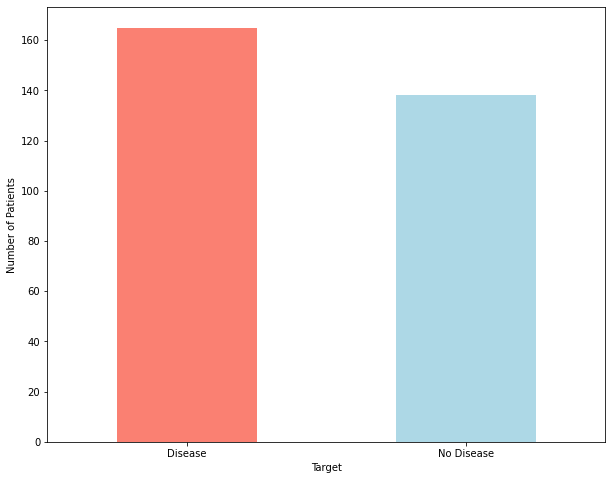

In [6]:
### Vizualising Number of patients with and without disease
plt.figure(figsize=(10,8))
df['target'].value_counts().plot(kind = 'bar',color = ['salmon','lightblue'],)
plt.xlabel('Target')
plt.ylabel('Number of Patients')
plt.xticks(ticks = [0,1],rotation = 0,labels = ['Disease','No Disease'])
plt.show()

**Target vs Sex**

Adding further filter to determine the if gender has any influence on heart disease.

In [7]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


* If sex is female then majority of them are suffering from the disease
* If sex is male though the majority are not suffering but the difference between male and female suffering is small

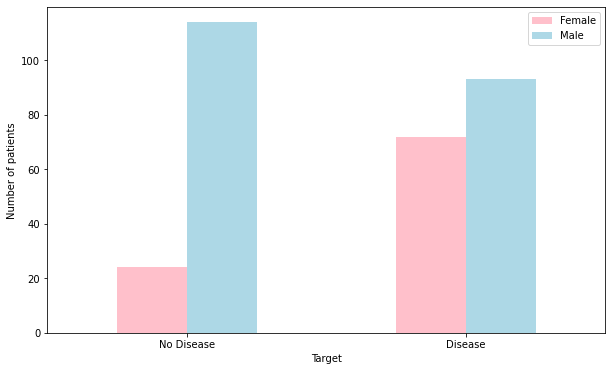

In [9]:
pd.crosstab(df['target'],df['sex']).plot(kind = 'bar',
                                         figsize = (10,6),
                                         color = ['pink','lightblue'])
plt.xlabel('Target')
plt.ylabel('Number of patients')
plt.legend(['Female','Male'])
plt.xticks(ticks = [0,1],labels = ['No Disease','Disease'],rotation = 0)
plt.show()

**Age vs heart rate disease**

In [10]:
### Different Values present in thalach feature
df['thalach'].value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

We have 91 different values for thalach(Heart Rate value)

**We need to plot the relation between age and heart rate for patients with disease and without disease**

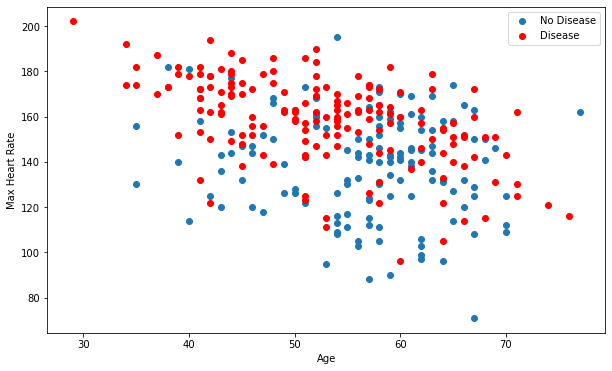

In [11]:
### Visualizing using scatter plot
plt.figure(figsize=(10,6))
x0 = df[df['target']==0]['age']
y0 = df[df['target']==0]['thalach']
plt.scatter(x0,y0)

x1 = df[df["target"] == 1]['age']
y1 = df[df['target'] == 1]['thalach']
plt.scatter(x1,y1,c = 'red')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['No Disease','Disease'])
plt.show()

From this scatter plot it is not easy to identify a pattern to distinguish between disease and no-disease. 

### Correlation Matrix
Let's create correlation matrix to visualize relation between each feature with themselves and relation betweem feature and target values

In [12]:
cor_mat = df.corr()
cor_mat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

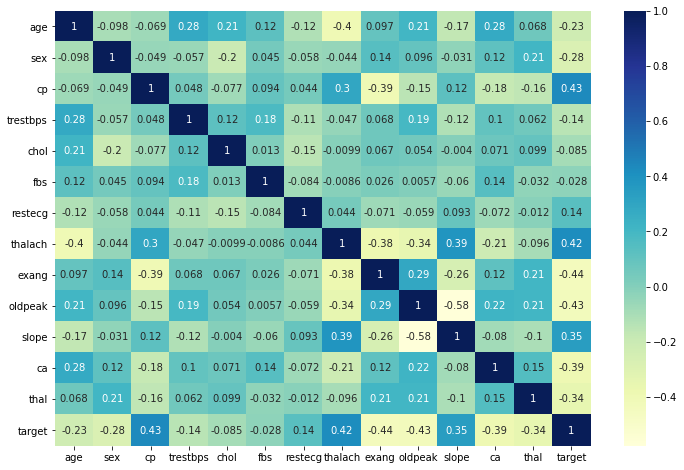

In [13]:
### Visualizing Correlation Matrix using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(cor_mat,annot = True,cmap='YlGnBu')

Looking through the correlation matrix we can see these following combination holds the strongest correlation
* target vs cp
* exang vs target
* oldpeak vs slope
* oldpeak vs target

... let's evaluate these relations

**Chest Pain(cp) Vs Target**

In [14]:
### Different values for chest pain 
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Discription of the values
* cp: chest pain type
 - Value 1: typical angina-Angina chest pain is a pressure or squeezing like sensation that is usually caused when your heart muscle doesn't get an    adequate supply of oxygenated blood.
 - Value 2: atypical angina-When one experiences chest pain that doesn't meet the criteria for angina, it's known as   atypical chest pain
 - Value 3: non-anginal pain- Type of pain not related to heart.
 - Value 4: asymptomatic-Asymptomatic means there are no symptoms of chest pain

In [20]:
pd.crosstab(df['cp'],df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


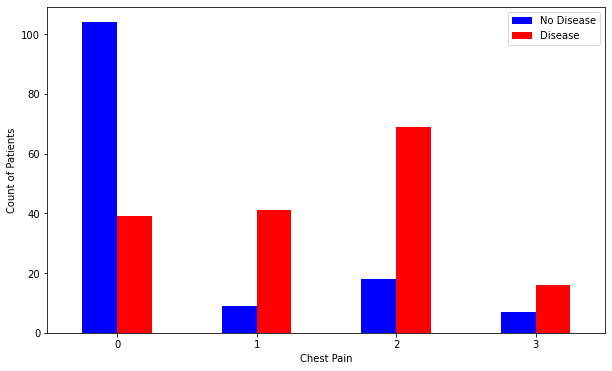

In [15]:
## Let's plot our above table to get a better understanding.
pd.crosstab(df['cp'],df['target']).plot(kind ='bar',color = ['blue','red'],figsize = (10,6))
plt.xlabel('Chest Pain')
plt.ylabel('Count of Patients')
plt.xticks(rotation = 0)
plt.legend(['No Disease','Disease'])

According to our data people experiencing typical angina pain are less likely to have heart disease. Additionally, patients with non-aginal pain are more prone to heart disease.

**Exang Vs Target**

In [16]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

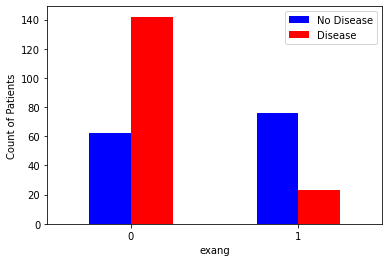

In [17]:
pd.crosstab(df['exang'],df['target']).plot(kind = 'bar',color = ['blue','red'])
plt.xticks(rotation = 0)
plt.ylabel('Count of Patients')
plt.legend(['No Disease','Disease'])

We see a negative correlation here such that when exang value is low(= 0) then the probability of having heart disease is higher and when the exang value is high then the chances of having heart disease is low

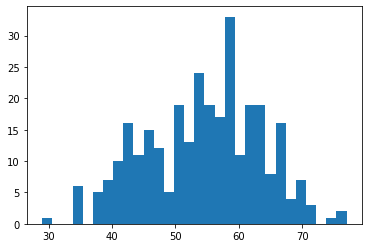

In [18]:
### Plotting a histogram to view the distribution of our data
plt.hist(df['age'],bins = 30);

## Modeling

In [32]:
# Split data into X and y
X = df.drop('target',axis = 1)
y = df['target']

In [33]:
### Using train test split function to split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
random.seed(42)
### Store all the models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}
# Create a function to perform training and testing on all the models
def model_fit_test(models,X_train,X_test,y_train,y_test):
    '''
    This function takes in models as a dictionary and fit each one on the 
    training data and then test it with the test data.
    models : dictionary of different Sklearn's machine learning models
    X_train : training data(without target column)
    X_test : testing data (without target column)
    y_train : labels for training
    y_test : labels for testing
    '''
    ### Creating a empty dictionary for storing prediction scores of the models
    Scores = {}
    for name, model in models.items():
        ### Fitting test data to the model for training
        model.fit(X_train,y_train)
        ### Using the score method to calculate the mean accuracy of the model
        score = model.score(X_test,y_test)
        ### appending the scores to the dictionary
        Scores[name] = score
        
    return Scores
        

In [35]:
### We have just created a baseline model for our problem lets check our baseline score
Baseline_score = model_fit_test(models,X_train,X_test,y_train,y_test)
Baseline_score

/Users/Anushka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8688524590163934}

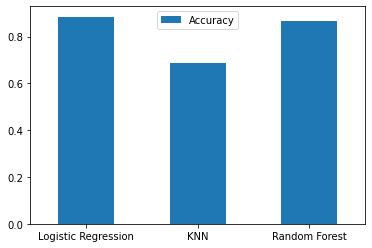

In [36]:

bl_score_df = pd.DataFrame(Baseline_score,index=['Accuracy'])
bl_score_df.T.plot(kind = 'bar')
plt.xticks(rotation = 0);

## Experimenting

### Hyperparameter Tuning
Since Knn has the lowest accuracy score and less number of features we can try adjusting it's hyperparameter by hands

In [37]:
### We will try to adjust hyperparameter K and P

###Creating a dictonary for storing score for each value of p
knn_score = {}

for p in [1,2]:
    ### List to store score for each value of k
    lst = []
    for k in range(1,30):
        ### Creating an object of knn model with different values of K and p parameter
        ### and fitting it with data
        knn = KNeighborsClassifier(n_neighbors=k,p=p)
        knn.fit(X_train,y_train)
        ### adding score of the model performance to the list
        lst.append(knn.score(X_test,y_test))
    ### Adding the final score list to the dictonary
    knn_score[p] = lst

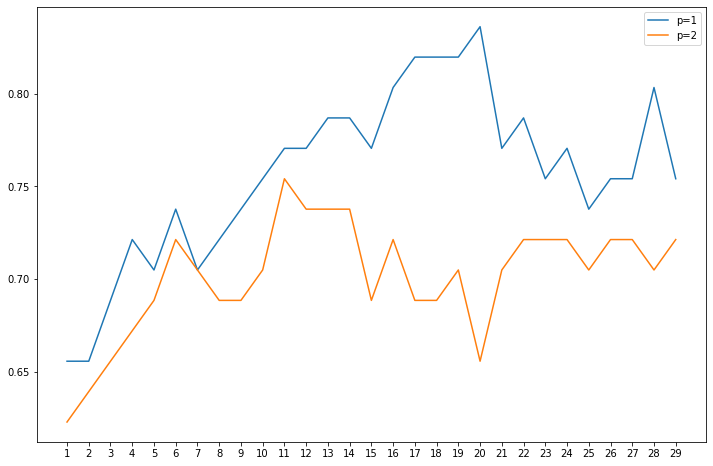

In [38]:
knn_sdf = pd.DataFrame(knn_score,index = range(1,30))
plt.figure(figsize=(12,8))
plt.plot(knn_sdf[1])
plt.plot(knn_sdf[2])
plt.xticks(range(1,30,1))
plt.legend(['p=1','p=2'])

We improved our KNN model by tunning it's hyperparameter but still it's accuracy is below the baseline scores of random forest and logistic regression. Thus we might have better chances in getting our desired results by tuning the hyperparameters of Random Forest and logistic regression.

### HyperParameter tuning by RandomizedSearchCV
We will be tuning hyperparameter for
* Logistic Regression model
* Random forest classifier model

using RandomSearchCV

In [39]:
log_param_grid = {'C':[100, 10, 1.0, 0.1, 0.01],
                 'solver': ['lbfgs','liblinear'],}

rfc_param_grid = {'n_estimators':list(range(10,500,40)),
                 'max_depth': [None,3,5,10],
                 'min_samples_split': np.arange(2,20,2),
                 'min_samples_leaf' : np.arange(1,20,2)}

In [40]:
### Tune Logistic Regression
np.random.seed(42)

### Creating Randomized Search object with random forest classifier
### Iterating 20 times
### Spliting data into 5 cross validation set
rs_log = RandomizedSearchCV(LogisticRegression(max_iter=1000),
                            param_distributions= log_param_grid,
                           n_iter = 20,
                           cv = 5,
                           verbose = True)

### fitting the Randomized Search object with training data
rs_log.fit(X_train,y_train)

/Users/Anushka/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/Anushka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Anushka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_iter=20,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'solver': ['lbfgs', 'liblinear']},
                   verbose=True)

In [41]:
### Finding out the best hyperparameter combination for logistic regression 
### based on the accuracy of the model
rs_log.best_params_

{'solver': 'liblinear', 'C': 1.0}

In [42]:
### Calculating scores using the best fit parameter on test data set
rs_log.score(X_test,y_test)

0.8688524590163934

In [43]:
### Tuning Random Forest Classifier model
np.random.seed(42)

### Creating Randomized Search object with random forest classifier
### Iterating 20 times
### Spliting data into 5 cross validation set
rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions= rfc_param_grid,
                           n_iter= 20,
                           cv = 5,
                           verbose = True)
### fitting the Randomized Search object with training data
rs_rfc.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': [10, 50, 90, 130, 170,
                                                         210, 250, 290, 330,
                                                         370, 410, 450, 490]},
                   verbose=True)

In [44]:
### Finding out the best hyperparameter combination for Random Forest classifier 
### based on the accuracy of the model
rs_rfc.best_params_

{'n_estimators': 250,
 'min_samples_split': 16,
 'min_samples_leaf': 15,
 'max_depth': 10}

In [45]:
### Calculating scores using the best fit parameter on test data set
rs_rfc.score(X_test,y_test)

0.8688524590163934

### Processing Data
**Scaling Data**

Running logistic regression model gives error of max iteration reached to resolve this error we need to scale our data using standard scaler.

In [46]:
###Importing Standard Scaler Library from sklearn
from sklearn.preprocessing import StandardScaler

In [47]:
### Creating object of standard scaler class
st_scaler = StandardScaler()
### transforming train data to scaled Data
X_train_scale = st_scaler.fit_transform(X_train)
### Transforming test data to scaled Data
X_test_scale = st_scaler.fit_transform(X_test)

In [48]:
### Now lets try fitting this scaled data to randoized Search object
rs_log.fit(X_train_scale,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/Anushka/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_iter=20,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'solver': ['lbfgs', 'liblinear']},
                   verbose=True)

In [49]:
rs_log.best_params_

{'solver': 'lbfgs', 'C': 1.0}

In [50]:
rs_log.score(X_test_scale,y_test)

0.8852459016393442

The Logistic model provide better results so we should try working on it's hyperparameter rather than trying to improve Random forest model.

### Grid Search

Tuning Hyperparameter for logistic Regression exhaustively 

In [51]:
log_grid = [{'C':np.logspace(-4,4,30)},
           {'C':np.logspace(-4,4,30),
           'penalty': ['l1','l2'],
           'solver': ['liblinear']}]
gs_log = GridSearchCV(LogisticRegression(max_iter=1000),
                     param_grid=log_grid,
                     cv = 5,
                     verbose=True)
gs_log.fit(X_train_scale,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid=[{'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.8939009...
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             verbose=True)

In [52]:
gs_log.best_params_

{'C': 0.01610262027560939, 'penalty': 'l2', 'solver': 'liblinear'}

In [53]:
gs_log.score(X_test_scale,y_test)

0.8852459016393442

The Best Score that a Logistic Regression Model can Provide is 
> Score = 0.8852459016393442


## Evaluating Our Model

We will calculate various evaluation metrics for our classification model
1. Confusion Matrics
2. Precision Value
3. Recall Value
4. F1 Score
5. Accuracy
5. Classification Report
6. Roc Curve
7. Auc Value

In [54]:
### 1. Confusion Matrix
y_prediction = gs_log.predict(X_test_scale)
cfm = confusion_matrix(y_test,y_prediction)
cfm

array([[25,  4],
       [ 3, 29]])

Text(33.0, 0.5, 'Predicted Labels')

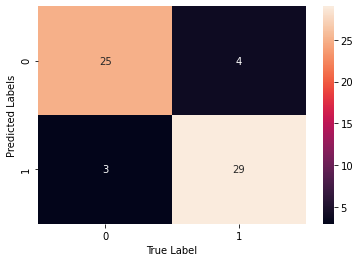

In [55]:
sns.heatmap(cfm,annot=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Labels')

In [56]:
### 2. Precision Score
ps = precision_score(y_test,y_prediction)
ps

0.8787878787878788

In [57]:
### 3. Recall Score
rs = recall_score(y_test,y_prediction)
rs

0.90625

In [58]:
### 4. F1 Score
f1_s = f1_score(y_test,y_prediction)
f1_s

0.8923076923076922

In [59]:
### 5. Accuracy
acc = accuracy_score(y_test,y_prediction)
acc

0.8852459016393442

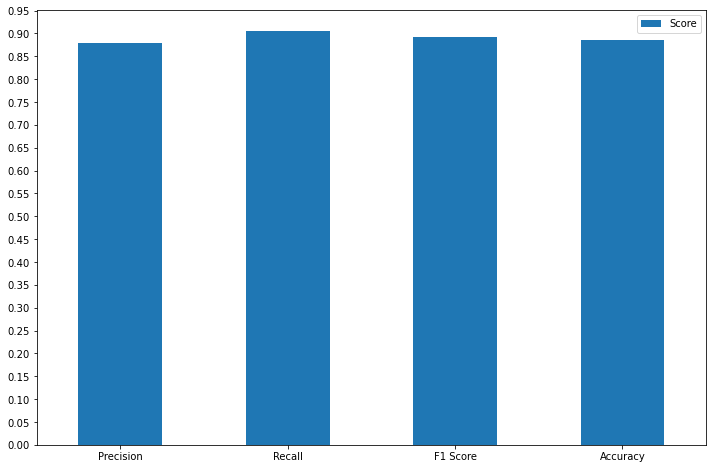

In [60]:
score_df = pd.DataFrame({'Precision': ps,
             'Recall': rs,
             'F1 Score': f1_s,
             'Accuracy': acc},index = ['Score'])

score_df.T.plot(kind = 'bar',figsize = (12,8))
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,1,0.05))
plt.show()

In [61]:
### 6. Classification Report
clf_report = classification_report(y_test,y_prediction)
print(clf_report)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [62]:
### 7. ROC Curve

fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = y_prediction)


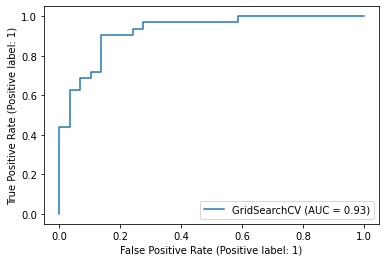

In [63]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gs_log,X_test_scale,y_test)

In [64]:
auc_score = roc_auc_score(y_test,y_prediction)
auc_score

0.8841594827586207

### Feature Importance

In [65]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
### Let's create our Logistic regression classifier model with the best parameters we discovered
clf = LogisticRegression(C = 0.01610262027560939, penalty = 'l2',
                         solver = 'liblinear')
clf.fit(X_train_scale,y_train)

LogisticRegression(C=0.01610262027560939, solver='liblinear')

In [67]:
### Check the coef_
clf.coef_

array([[-0.09618908, -0.24928182,  0.29208807, -0.0770986 , -0.03432837,
         0.01554241,  0.07183642,  0.20876639, -0.26740978, -0.27365838,
         0.19422556, -0.27981537, -0.2343119 ]])

In [68]:
### Coef of features to columnsa
feature_dict = dict(zip(df.columns,list(clf.coef_)[0]))
feature_dict

{'age': -0.09618907820508758,
 'sex': -0.24928182388266756,
 'cp': 0.2920880699449227,
 'trestbps': -0.0770985963042629,
 'chol': -0.03432836975066478,
 'fbs': 0.015542410725617064,
 'restecg': 0.07183641644458678,
 'thalach': 0.20876639357053028,
 'exang': -0.2674097766801317,
 'oldpeak': -0.27365838040877793,
 'slope': 0.19422556167246635,
 'ca': -0.279815371337279,
 'thal': -0.23431190030920412}

Text(0.5, 0, 'Features')

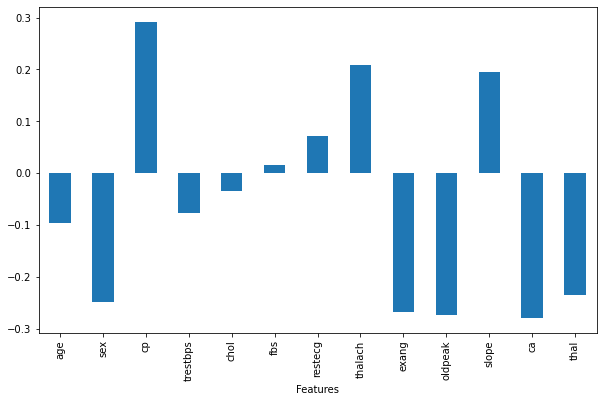

In [69]:
### Visualize feature Importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind = 'bar',legend = False,figsize = (10,6))
plt.xlabel('Features')